# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Importing Libraries

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import re
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import keras.layers as lay
from sklearn.preprocessing import  StandardScaler
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix


## Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')
# % accese as admin , for moving targted location
%cd '/content/drive/My Drive/T5/week5'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/T5/week5


In [4]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv')

In [5]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [6]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [7]:
df.shape

(147972, 21)

In [8]:
df.duplicated().sum()

0

In [10]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [11]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [12]:
df.replace(' ', pd.NA, inplace=True)
remove_unknown_other_na=df.columns
for column in remove_unknown_other_na:
    mode_value = df[column].replace(['Unknown', 'na', 'Other'], pd.NA).mode()[0]
    df[column] = df[column].replace(['Unknown', 'na', 'Other'], mode_value).fillna(mode_value)

In [13]:
df.drop(['School_Age_or_PreK'], axis=1, inplace=True)

In [14]:
df['Bus_No'] = df['Bus_No'].map(df['Bus_No'].value_counts())

In [15]:
df['Schools_Serviced'] = df['Schools_Serviced'].map(df['Schools_Serviced'].value_counts())

In [16]:
# convert the date coulnms
df['Occurred_On'] = pd.to_datetime(df['Occurred_On'])
df['Created_On'] = pd.to_datetime(df['Created_On'])
df['Informed_On'] = pd.to_datetime(df['Informed_On'])
df['Last_Updated_On'] = pd.to_datetime(df['Last_Updated_On'])


In [17]:
df['Occurred_Year'] = df['Occurred_On'].dt.year
df['Occurred_Month'] = df['Occurred_On'].dt.month
df['Occurred_Day'] = df['Occurred_On'].dt.day
df['Occurred_Hour'] = df['Occurred_On'].dt.hour

In [18]:
df['Created_Year'] = df['Created_On'].dt.year
df['Created_Month'] = df['Created_On'].dt.month
df['Created_Day'] = df['Created_On'].dt.day
df['Created_Hour'] = df['Created_On'].dt.hour

In [19]:
df['Informed_On_Year'] = df['Informed_On'].dt.year
df['Informed_On_Month'] = df['Informed_On'].dt.month
df['Informed_On_Day'] = df['Informed_On'].dt.day
df['Informed_On_Hour'] = df['Informed_On'].dt.hour

In [20]:
df['Last_Updated_Year'] = df['Last_Updated_On'].dt.year
df['Last_Updated_Month'] = df['Last_Updated_On'].dt.month
df['Last_Updated_Day'] = df['Last_Updated_On'].dt.day
df['Last_Updated_Hour'] = df['Last_Updated_On'].dt.hour

In [21]:
df = df.drop(columns=['Occurred_On'])
df = df.drop(columns=['Created_On'])
df = df.drop(columns=['Informed_On'])
df = df.drop(columns=['Last_Updated_On'])

In [23]:
scaler = MinMaxScaler()

date_columns = ['Occurred_Year', 'Occurred_Month', 'Occurred_Day', 'Occurred_Hour',
                'Created_Year', 'Created_Month', 'Created_Day', 'Created_Hour',
                'Informed_On_Year', 'Informed_On_Month','Informed_On_Day','Informed_On_Hour',
                'Last_Updated_Year','Last_Updated_Month','Last_Updated_Day','Last_Updated_Hour']
df[date_columns] = scaler.fit_transform(df[date_columns])

In [24]:
# after i notice that i have different formationg for How_Long_Delayed coulnms , i initlize this code function
def convert_to_minutes(time_str):
  if pd.isnull(time_str):
    return None
#converting in lower case
  time_str = time_str.lower()
#initialize minutes to uniform the format
  total_minutes = 0

  houres_match = re.search(r'(\d+)\s*hour', time_str)
  minutes_match = re.search(r'(\d+)\s*minute|mins?', time_str)
  seconds_match = re.search(r'(\d+)\s*second', time_str)

# 0 if its null
  if houres_match:
    total_minutes+= int(houres_match.group(1) or 0) * 60

  if minutes_match:
    total_minutes+= int(minutes_match.group(1) or 0)

  if seconds_match:
    total_minutes+= int(houres_match.group(1) or 0) / 60.0

  addition_min_match =  re.search(r'(\d+)\s*mon|mini|minute|mins?', time_str)
  if addition_min_match:
    total_minutes += int(addition_min_match.group(1) or 0)


  return total_minutes

In [25]:
df['How_Long_Delayed_minutes'] = df['How_Long_Delayed'].apply(convert_to_minutes)

In [26]:
df = df.drop(columns=['How_Long_Delayed'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   School_Year                      147972 non-null  int64  
 1   Busbreakdown_ID                  147972 non-null  int64  
 2   Run_Type                         147972 non-null  int64  
 3   Bus_No                           147972 non-null  int64  
 4   Route_Number                     147972 non-null  int64  
 5   Reason                           147972 non-null  int64  
 6   Schools_Serviced                 147972 non-null  int64  
 7   Boro                             147972 non-null  int64  
 8   Bus_Company_Name                 147972 non-null  int64  
 9   Number_Of_Students_On_The_Bus    147972 non-null  int64  
 10  Has_Contractor_Notified_Schools  147972 non-null  object 
 11  Has_Contractor_Notified_Parents  147972 non-null  object 
 12  Ha

In [37]:
label_encoder = LabelEncoder()

df['School_Year'] = label_encoder.fit_transform(df['School_Year'])
df['Run_Type'] = label_encoder.fit_transform(df['Run_Type'])
df['Route_Number'] = label_encoder.fit_transform(df['Route_Number'])
df['Reason'] = label_encoder.fit_transform(df['Reason'])
df['Schools_Serviced'] = label_encoder.fit_transform(df['Schools_Serviced'])
df['Route_Number'] = label_encoder.fit_transform(df['Route_Number'])
df['Boro'] = label_encoder.fit_transform(df['Boro'])
df['Bus_Company_Name']= label_encoder.fit_transform(df['Bus_Company_Name'])
df['How_Long_Delayed_minutes']= label_encoder.fit_transform(df['How_Long_Delayed_minutes'])
df['Number_Of_Students_On_The_Bus']= label_encoder.fit_transform(df['Number_Of_Students_On_The_Bus'])
df['Incident_Number']= label_encoder.fit_transform(df['Incident_Number'])
df['Has_Contractor_Notified_Schools']= label_encoder.fit_transform(df['Has_Contractor_Notified_Schools'])
df['Has_Contractor_Notified_Parents']= label_encoder.fit_transform(df['Has_Contractor_Notified_Parents'])
df['Have_You_Alerted_OPT']= label_encoder.fit_transform(df['Have_You_Alerted_OPT'])
df['Breakdown_or_Running_Late']= label_encoder.fit_transform(df['Breakdown_or_Running_Late'])


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   School_Year                      147972 non-null  int64  
 1   Busbreakdown_ID                  147972 non-null  int64  
 2   Run_Type                         147972 non-null  int64  
 3   Bus_No                           147972 non-null  int64  
 4   Route_Number                     147972 non-null  int64  
 5   Reason                           147972 non-null  int64  
 6   Schools_Serviced                 147972 non-null  int64  
 7   Boro                             147972 non-null  int64  
 8   Bus_Company_Name                 147972 non-null  int64  
 9   Number_Of_Students_On_The_Bus    147972 non-null  int64  
 10  Has_Contractor_Notified_Schools  147972 non-null  int64  
 11  Has_Contractor_Notified_Parents  147972 non-null  int64  
 12  Ha

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [40]:
x=df.drop('Breakdown_or_Running_Late', axis=1)
y=df['Breakdown_or_Running_Late']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [44]:
model = Sequential([
    lay.Dense(128, activation='relu', input_dim= x_train.shape[1]),
    lay.Dense(75, activation='relu'),
    lay.Dense(60, activation='relu'),
    lay.Dense(32, activation='relu'),
    lay.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [69]:
History = model.fit(x_train, y_train, batch_size=10, epochs=10, validation_split=0.2)

Epoch 1/10
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8829 - loss: 0.3612 - val_accuracy: 0.8860 - val_loss: 0.3547
Epoch 2/10
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8827 - loss: 0.3618 - val_accuracy: 0.8860 - val_loss: 0.3554
Epoch 3/10
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8842 - loss: 0.3586 - val_accuracy: 0.8860 - val_loss: 0.3549
Epoch 4/10
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8832 - loss: 0.3608 - val_accuracy: 0.8860 - val_loss: 0.3547
Epoch 5/10
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8828 - loss: 0.3615 - val_accuracy: 0.8860 - val_loss: 0.3549
Epoch 6/10
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8831 - loss: 0.3609 - val_accuracy: 0.8860 - val_loss: 0.3549
Epoch 7/10
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.8817 - loss: 0.3636 - val_accuracy: 0.8860 - val_loss: 0.3551
Epoch 8/10
9471/9471 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.8837 - loss: 0

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [70]:
model.evaluate(x_test, y_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8859 - loss: 0.3553


[0.3531009554862976, 0.8870755434036255]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [71]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[    0  3342]
 [    0 26253]]


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

AttributeError: 'History' object has no attribute 'History'

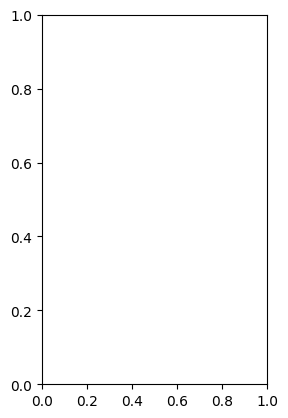

In [73]:
plt.subplot(1, 2, 1)
plt.plot(History.History['accuracy'], label='Training Accuracy')
plt.plot(History.History['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## Save the Model
Save the trained model for submission.

In [74]:
model.save('model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

* I chose the label encoder because it does not increase the number of columns in the data. I also converted all the columns that are of date type and divided them into columns, each column having a month, year, day, and hour. Then I converted them to a max min scaler so that I could enter them into the ANN.

* I noticed that the data had many requirements for cleaning, so I created a function to unify the time unit and then make it a new column and insert it into the dataset as a new column called How_Long_Delayed_minutes.

* I didn't have time to clean up every row and column so I did a if statment to process all the empty data.

* i struglled with the epoche running so i couldnt test my model very well and also i was not have time so i did not visulise the model